## Dependencies

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

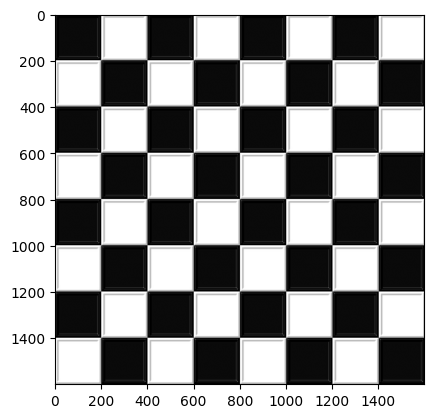

In [3]:
cb_img = cv2.imread('./assets/checkerboard.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(cb_img,cmap='gray')

In [4]:
cb_img

array([[ 65,  57,  55, ..., 227, 210, 199],
       [ 55,  63,  65, ..., 229, 213, 203],
       [ 45,  53,  59, ..., 225, 210, 201],
       ...,
       [245, 246, 240, ...,   0,   0,   0],
       [234, 235, 228, ...,   0,   0,   0],
       [225, 227, 221, ...,   0,   0,   0]], dtype=uint8)

## Enhancement

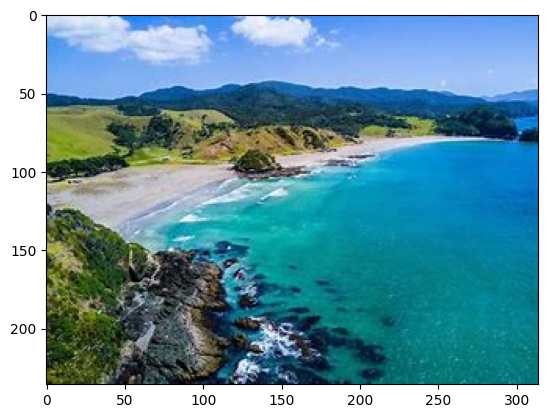

In [6]:
beach1 = cv2.imread('./assets/beach1.jpeg',cv2.IMREAD_COLOR)
beach1_rgb = cv2.cvtColor(beach1,cv2.COLOR_BGR2RGB)
plt.imshow(beach1_rgb)

### Change brightness

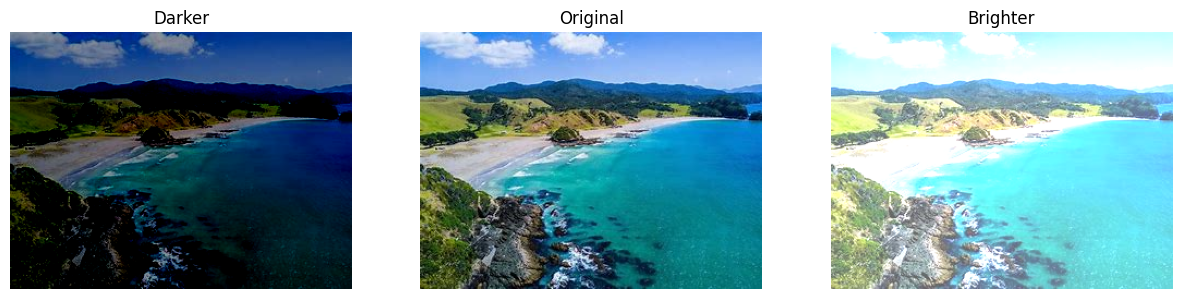

In [7]:
matrix = np.ones(beach1_rgb.shape, dtype='uint8') *100

beach1_brighter = cv2.add(beach1_rgb,matrix)

beach1_darker = cv2.subtract(beach1_rgb,matrix)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(beach1_darker)
plt.title('Darker')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(beach1_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(beach1_brighter)
plt.title('Brighter')
plt.axis('off')

plt.show()

### Change contrast


-- Just like addition and subtraction to the image matrices result in change in brightness, the multiplication can be used to change the contrast of an image.

-- Contrast is the difference between the intensity values of the pixels. Low contrast corresponds to pixel values clustered around a small range, conversely, in high contrast image the difference between bright and dark pixels is greater making them more distinct.

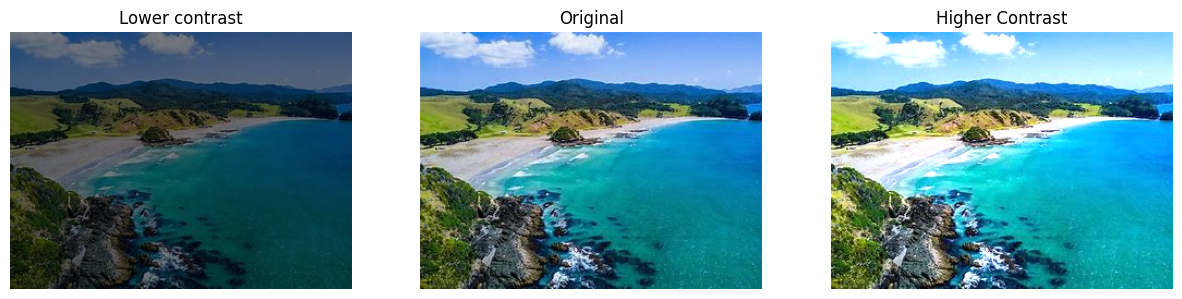

In [37]:
matrix1 = np.ones(beach1_rgb.shape, dtype='uint8') *.5
matrix2 = np.ones(beach1_rgb.shape, dtype='uint8')*1.3

beach1_brighter = np.uint8(np.clip(cv2.multiply(np.float64(beach1_rgb),matrix2),0,255))

beach1_darker = np.uint8(np.clip(cv2.multiply(np.float64(beach1_rgb),matrix1),0,255))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(beach1_darker)
plt.title('Lower contrast')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(beach1_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(beach1_brighter)
plt.title('Higher Contrast')
plt.axis('off')

plt.show()

#### Histogram interpretation

In [34]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 255), color='black', alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

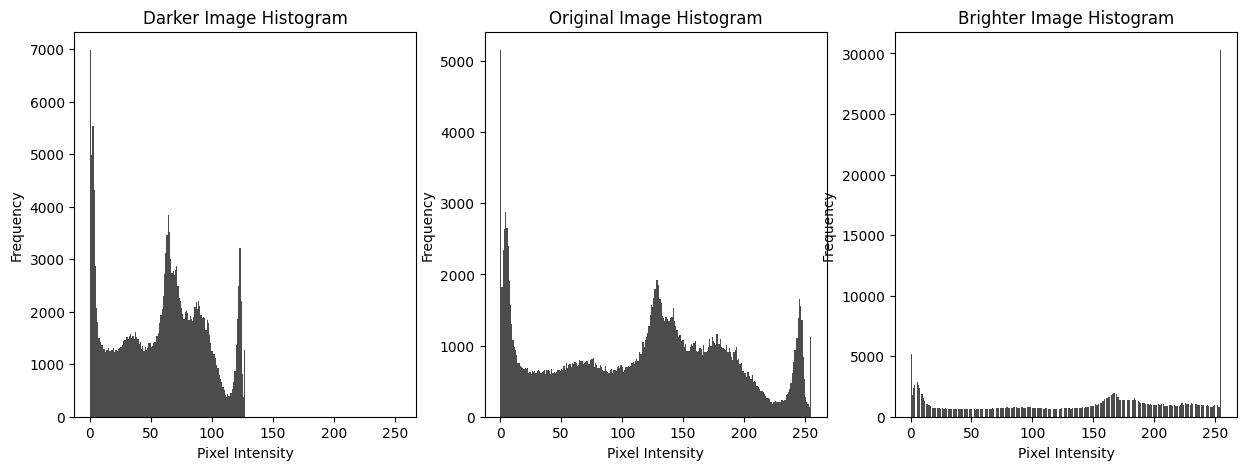

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_histogram(beach1_darker, "Darker Image Histogram")

plt.subplot(1, 3, 2)
plot_histogram(beach1_rgb, "Original Image Histogram")

plt.subplot(1, 3, 3)
plot_histogram(beach1_brighter, "Brighter Image Histogram")

plt.show()

### Image Thresholding

-- Refer notes

Text(0.5, 1.0, 'Thresholded')

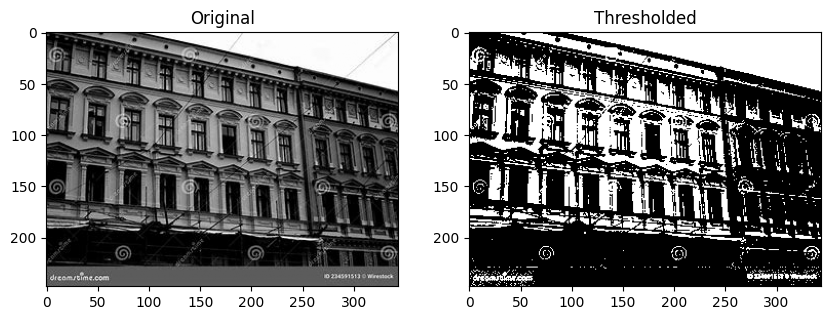

In [ ]:
building = cv2.imread('./assets/building_windows.jpeg',0)
retval, imgthresh = cv2.threshold(building,100,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(building,cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(imgthresh,cmap='gray')
plt.title('Thresholded')

print(f'Original shape: {building.shape}')

#### Application - Sheet music

Text(0.5, 1.0, 'Adaptive Threshold')

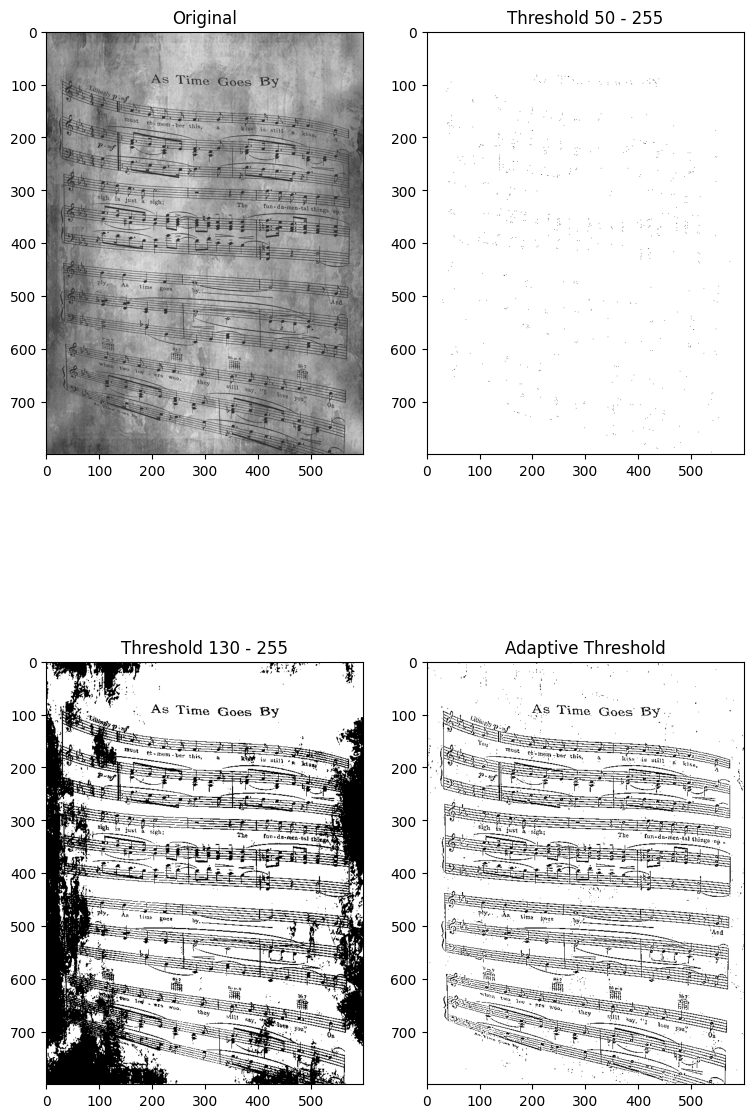

In [60]:
sheet1=cv2.imread('./assets/sheet_music_natural.jpeg',cv2.IMREAD_GRAYSCALE)

# global thresholding - 50 to 255
retval, sheet_thresh1 = cv2.threshold(sheet1,50,255,cv2.THRESH_BINARY)

# global thresholding - 130 to 255
retval, sheet_thresh2 = cv2.threshold(sheet1,130,255,cv2.THRESH_BINARY)

# adaptive thresholding
sheet_thresh3 = cv2.adaptiveThreshold(sheet1,237,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blockSize=9,C=15)

plt.figure(figsize=(9,15))

plt.subplot(2,2,1)
plt.imshow(sheet1,cmap='gray')
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(sheet_thresh1,cmap='gray')
plt.title('Threshold 50 - 255')

plt.subplot(2,2,3)
plt.imshow(sheet_thresh2,cmap='gray')
plt.title('Threshold 130 - 255')

plt.subplot(2,2,4)
plt.imshow(sheet_thresh3,cmap='gray')
plt.title('Adaptive Threshold')

Text(0.5, 1.0, 'Enhanced using Adaptive threshold')

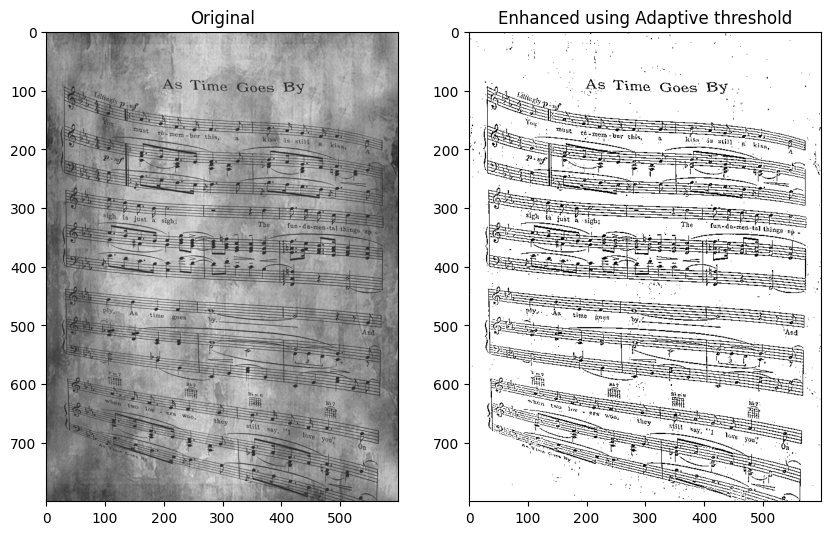

In [65]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(sheet1,cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(sheet_thresh3,cmap='gray')
plt.title('Enhanced using Adaptive threshold')

### Bitwise operations

Text(0.5, 1.0, 'Bitwise NOT')

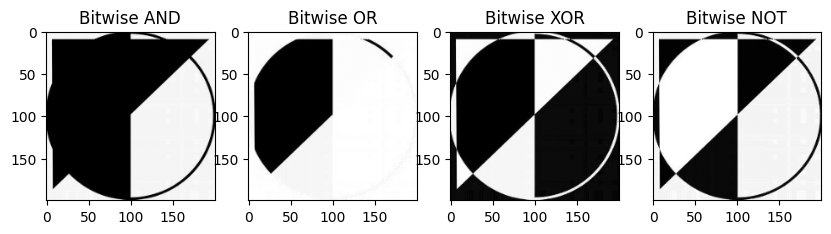

In [73]:
circle = cv2.resize(cv2.imread('./assets/circle.jpeg',0),(200,200))
square = cv2.resize(cv2.imread('./assets/square.jpeg',0),(200,200))

result1 = cv2.bitwise_and(circle,square,mask=None)
result2 = cv2.bitwise_or(circle,square,mask=None)
result3 = cv2.bitwise_xor(circle,square,mask=None)

plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.imshow(result1,cmap='gray')
plt.title('Bitwise AND')

plt.subplot(1,4,2)
plt.imshow(result2,cmap='gray')
plt.title('Bitwise OR')

plt.subplot(1,4,3)
plt.imshow(result3,cmap='gray')
plt.title('Bitwise XOR')

plt.subplot(1,4,4)
plt.imshow(cv2.bitwise_not(result3,mask=None),cmap='gray')
plt.title('Bitwise NOT')
